Includes

In [17]:
import pandas as pd
import numpy as np
import glob
from matplotlib import pyplot as plt
from matplotlib import colors
# import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
# import statsmodels.api as sm
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


import cv2
from random import randint
# from PIL import Image
from os import listdir

Compress images

In [18]:
# def compress_image(path : str):
# 	im = Image.open(path)
# 	im.thumbnail((500, 500), Image.LANCZOS)
# 	im.save(path.replace('dataset', 'reduced_dataset'))

# def compress_dataset(path : str):
# 	for num in range(0,6):
# 		men_dir = path + f'men/{num}/'
# 		women_dir = path + f'Women/{num}/'
# 		for file in listdir(men_dir):
# 			compress_image(men_dir + file)
# 		for file in listdir(women_dir):
# 			compress_image(women_dir + file)

# compress_dataset('../../dataset/')

Read training dataset

In [16]:
def read_image(path: str) -> np.array:
	img = cv2.imread(path)
	img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
	dx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=1)
	dy = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=1)
	img_filtered = np.hypot(dx,dy)
	img_filtered *= 255.0/np.max(img_filtered)
	# img_filtered = cv2.threshold(img_filtered,thresh=50,maxval=255,type=cv2.THRESH_BINARY)[1]
	# histogramV = np.array([np.mean(np.sum(img_filtered,axis=0))])
	# img = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)
	# img_filtered = cv2.inRange(img,(0,139,77),(255,163,140))
	# img = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)
	# img_gray = cv2.inRange(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY),0,128)
	# brightness_coeff = (np.mean(img_gray)/255 - 0.015)*10.25
	# img_filtered = cv2.inRange(img,(0,int(133+brightness_coeff),77),(255,163,140))
	# print(img_filtered_cluttered[5][0])
	# img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
	# img_masked_shadow = np.bitwise_not(cv2.inRange(img,(0,0,80),(255,55,179)))
	# img_masked_hand = cv2.inRange(img,(5,35,30),(25,255,255))
	# img_filtered = np.bitwise_and(img_masked_shadow,img_masked_hand)
	# area = np.array([np.sum(img_filtered.reshape((-1))) / 255])
	# bucket_size = 10
	# img_filtered_cluttered = img_filtered[1:,:].reshape((int(img_filtered[1:,:].shape[0]/bucket_size),-1,bucket_size))
	# histogramH = np.array([np.mean(np.diff(np.sum(img_filtered_cluttered,axis=(1,2))))])
	# # print(histogramH.dtype)
	# bucket_size = 20
	# img_filtered_cluttered = img_filtered.reshape((-1,int(img_filtered.shape[1]/bucket_size),bucket_size))
	return np.concatenate(([], img_filtered.reshape(-1)))

def read_images(directory : str) -> np.array:
	array = np.array([], dtype=np.int8).reshape(0, 140501)
	for num in range(0,6):
		men_dir = directory + f'men/{num}/'
		women_dir = directory + f'Women/{num}/'
		new_men = np.array([np.concatenate((np.asarray([num]), read_image(men_dir + file)), axis=0) for file in listdir(men_dir)])
		new_women = np.array([np.concatenate((np.asarray([num]), read_image(women_dir + file)), axis=0) for file in listdir(women_dir)])
		array = np.concatenate((array, new_men, new_women), axis=0)
	return array

dataset = read_images('../clean_reduced_dataset/')

In [19]:
train, validation = train_test_split(dataset, test_size=0.1)
X = train[:, 1:]
y = train[:, 0]
X_val = validation[:, 1:]
y_val = validation[:, 0]

In [20]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        # html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        # html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        # html_str+='</td></th>'
    display_html(html_str,raw=True)

John's Code

In [21]:
# count_arr = np.zeros((6,6))
def model_prediction(model, x_training, y_training, x_validation, y_validation):
	model.fit(x_training, y_training)
	
	prediction_training = np.array(np.round(model.predict(x_training)), dtype=np.int8)
	prediction_validation = np.array(np.round(model.predict(x_validation)), dtype=np.int8)
	acc_training = accuracy_score(y_training, prediction_training)
	acc_validation = accuracy_score(y_validation, prediction_validation)

	confusion_matrix_training = confusion_matrix(y_training, prediction_training)
	confusion_matrix_validation = confusion_matrix(y_validation, prediction_validation)
	# print("Confusion Matrix Training: \n", confusion_matrix_training)
	display_side_by_side(pd.DataFrame(confusion_matrix_training), pd.DataFrame(confusion_matrix_validation))
	# print("Confusion Matrix Validation: \n", confusion_matrix_validation)
	print("Accuracuy Score Training: ", acc_training)
	print("Accuracy Score Validation: ",acc_validation)

PCA

In [22]:
pca = PCA(n_components=30).fit(X)

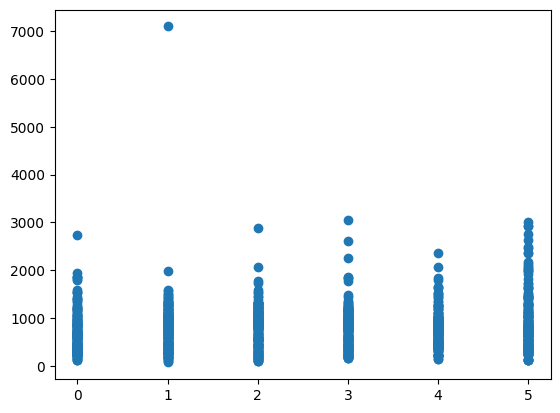

In [38]:
print('Random forest classifier')
for i in range(1, 6):
	print(f'Run no.{i}:')
	model_prediction(RandomForestClassifier(n_estimators = 500, min_samples_split=10, max_features=None), pca.transform(X), y, pca.transform(X_val), y_val)
# print('Random forest regressor')
# model_prediction(RandomForestRegressor(n_estimators = 500, min_samples_split=10, max_features=None), pca.transform(X), y, pca.transform(X_val), y_val)

# print('KNN')
# model_prediction(KNeighborsClassifier(n_neighbors=6), pca.transform(X), y, pca.transform(X_val), y_val)
# dataset = np.array([])
# for filename in sorted(glob.glob('../clean_reduced_dataset/men/*/*.JPG')):
# 	img = cv2.imread(filename)
# 	img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# 	dx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=7)
# 	dy = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=7)
# 	img_masked = np.linalg.norm(np.array([dx,dy]),axis=0)
# 	img_masked *= 255.0/np.max(img_masked)
# 	img_masked = np.asarray(cv2.threshold(img_masked,thresh=100,maxval=255,type=cv2.THRESH_BINARY)[1],dtype=np.uint8)

# 	ctrs, _ = cv2.findContours(img_masked,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
# 	max_ctr = max(ctrs,key=cv2.contourArea)
# 	contour = np.zeros(img_masked.shape)
# 	cv2.drawContours(contour,max_ctr,-1,(255,0,0),1)
# 	# print(cv2.contourArea(max_ctr))
# 	# histogramV = np.mean(np.sum(img_masked,axis=0))
# 	label = int(filename[29])
# 	array = np.array([label,cv2.contourArea(max_ctr)])
# 	dataset = np.concatenate((dataset,array),axis=0)
# dataset = dataset.reshape(-1,2)
# cmap = colors.ListedColormap(['red','green','blue','yellow','cyan','pink'])
# plt.scatter(dataset[:,0],dataset[:,1])
# train, validation = train_test_split(dataset, test_size=0.1)
# X = train[:, 1:]
# y = train[:, 0]
# X_val = validation[:, 1:]
# y_val = validation[:, 0]
# print('KNN')
# model_prediction(KNeighborsClassifier(n_neighbors=6), X, y, X_val, y_val)

In [ ]:
for i in range(10, 50, 2):
	print('*'* 20)
	print(f'PCA {i} components')
	pca = PCA(n_components=i).fit(X)
	print('Random forest')
	model_prediction(RandomForestClassifier(n_estimators = 500, min_samples_split=10, max_features=None), pca.transform(X), y, pca.transform(X_val), y_val)
	# print('KNN, N=5')
	# model_prediction(KNeighborsClassifier(n_neighbors=5), pca.transform(X), y, pca.transform(X_val), y_val)
	print('*'* 20)
	print('\n\n')